In [85]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
import face_recognition
import time
from IPython.display import clear_output
import pickle



In [2]:
root_folder = r'../data/celeb_dataset/img_align_celeba/img_align_celeba/'
sample_df = pd.read_csv('../data/celeb_dataset/samples.csv')

In [4]:
def count_covered_pixels(image_path, window_size, step):
    # Load the image and convert it to a NumPy array
    image = Image.open(image_path)
    data = np.asarray(image)
    
    # Initialize the count array with zeros
    count_array = np.zeros(data.shape[:2], dtype=int)
    pred_array = np.zeros(data.shape[:2], dtype=int)
    
    # Define the sliding window's height and width
    window_height, window_width = window_size
    
    # Iterate through the image using the sliding window
    for i in tqdm(range(0, data.shape[0] - window_height + 1, step)):
        for j in range(0, data.shape[1] - window_width + 1, step):
            if j == 2:

                return pred_array , count_array
            # Increment the count for each pixel covered by the window
            count_array[i:i + window_height, j:j + window_width] += 1

            temp_data = data.copy()
            temp_data[i:i + window_height, j:j + window_width] = 0
            if i == 99 and j == 99:
                plt.imshow(temp_data)

            face_locations = face_recognition.face_locations(temp_data)
            if len(face_locations) > 0:
                pred_array[i:i + window_height, j:j + window_width] += 1 
            

    
    return pred_array , count_array

100%|██████████| 60/60 [00:39<00:00,  1.52it/s]


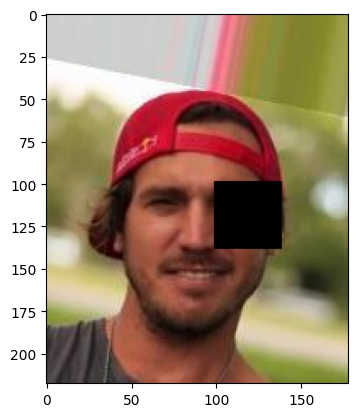

In [119]:

# Example usage
image_path = root_folder + sample_df.iloc[0]['image_id']
window_size = 40,40
step = 3

pred_array , count_array = count_covered_pixels(image_path, window_size, step)


/tmp/ipykernel_7799/2183388250.py:1: RuntimeWarning: invalid value encountered in divide
  res_arr = pred_array / count_array


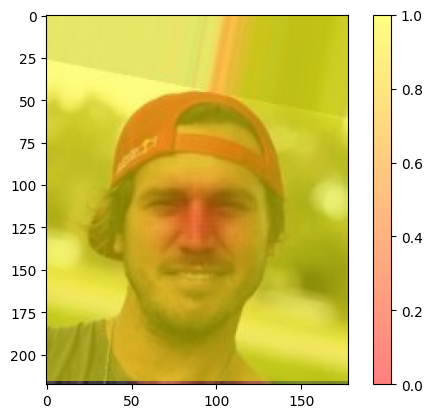

In [120]:

res_arr = pred_array / count_array
image = face_recognition.load_image_file(root_folder + sample_df.iloc[0]['image_id'])
plt.imshow(image)
plt.imshow(res_arr,vmin=0,vmax=1 ,alpha=0.5,cmap='autumn')
plt.colorbar()
plt.show()

clear_output(wait=True)

100%|██████████| 60/60 [00:39<00:00,  1.53it/s]


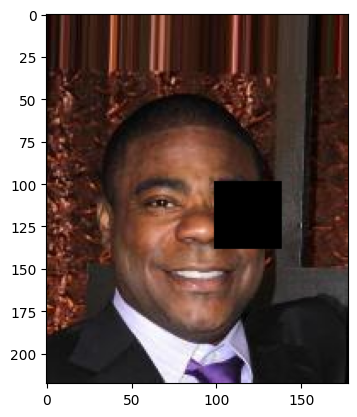

In [29]:
importance_preds2 = {}
for i in range(2, 5):
    image_path = root_folder + sample_df.iloc[i]['image_id']
    window_size = 40,40
    step = 3

    pred_array , count_array = count_covered_pixels(image_path, window_size, step)
    importance_preds2[i] = (pred_array,count_array)

(86, 135, 176, 46)


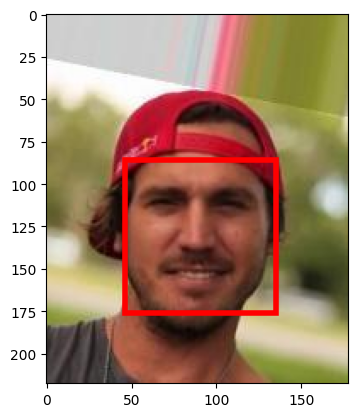

In [82]:
img = face_recognition.load_image_file(root_folder + sample_df.iloc[0]['image_id'])
locs = face_recognition.face_locations(img)[0]
print(locs)
plt.imshow(img)
ax = plt.gca()
rect = patches.Rectangle((locs[3], locs[0]), locs[1]-locs[3], locs[2]-locs[0], linewidth=4, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [6]:
count_array.shape

(218, 178)

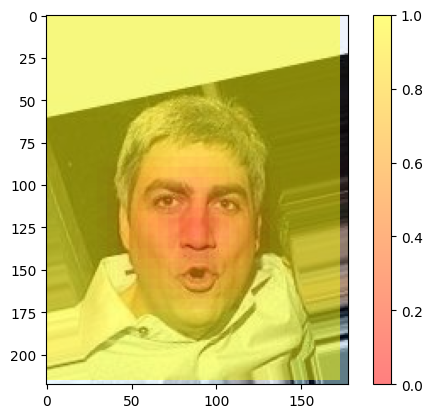

KeyboardInterrupt: 

In [118]:
for i, (pred_array,count_array) in importance_preds2.items():
    image = face_recognition.load_image_file(root_folder + sample_df.iloc[i]['image_id'])
    res_arr = pred_array / count_array
    plt.imshow(image)
    plt.imshow(res_arr,vmin=0,vmax=1 ,alpha=0.5,cmap='autumn')

    plt.colorbar()
    plt.show()
    time.sleep(1)
    clear_output(wait=True)

In [37]:
importance_preds2[3][0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
image = Image.open(image_path)
data = np.asarray(image)
datacopy = data.copy()
datacopy[10:10 + 30, 50:50 + 30] = 0
temp_image = Image.fromarray(datacopy)

In [83]:
importance_preds3 = {}
for i in range(5, 200):
    image_path = root_folder + sample_df.iloc[i]['image_id']
    window_size = 54,54
    step = 6

    pred_array , count_array = count_covered_pixels(image_path, window_size, step)
    importance_preds2[i] = (pred_array,count_array)

 18%|█▊        | 5/28 [00:01<00:07,  3.03it/s]


KeyboardInterrupt: 

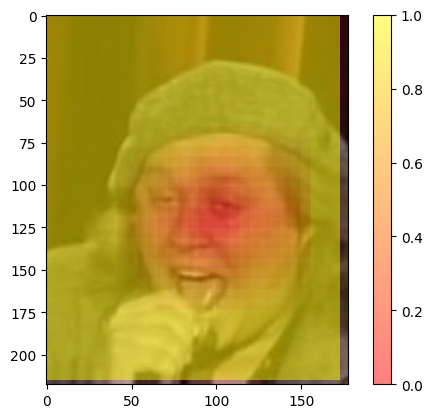

In [87]:
for i, (pred_array,count_array) in importance_preds2.items():
    image = face_recognition.load_image_file(root_folder + sample_df.iloc[i]['image_id'])
    res_arr = pred_array / count_array
    plt.imshow(image)
    plt.imshow(res_arr,vmin=0,vmax=1 ,alpha=0.5,cmap='autumn')
    plt.colorbar()
    plt.show()
    time.sleep(1)
    clear_output(wait=True)

In [86]:
#pickle.dump(importance_preds2,open('importance_preds2.pkl','wb'))

In [88]:
importance_preds2 = pickle.load(open('importance_preds2.pkl','rb'))